In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
filename = "../../input/prophet/WFC_5yr.csv"
data = pd.read_csv(filename) 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,56.060001,56.150002,55.439999,55.500000,46.737270,13623200
1,2015-07-10,56.330002,56.459999,55.860001,56.080002,47.225693,13269600
2,2015-07-13,56.560001,56.759998,56.419998,56.740002,47.781506,15521800
3,2015-07-14,56.459999,57.369999,56.389999,57.250000,48.210964,20066300
4,2015-07-15,57.410000,58.160000,57.259998,57.779999,48.657288,17159400


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,50.472240,50.926942,50.002311,50.455806,45.767795,2.245966e+07
std,7.442429,7.396904,7.533015,7.480667,6.344081,1.231888e+07
min,22.129999,23.830000,22.000000,22.530001,22.530001,4.635500e+06
25%,48.029999,48.344999,47.570000,47.975001,43.303795,1.527920e+07
50%,51.950001,52.500000,51.509998,51.959999,46.819538,1.866190e+07
75%,54.799999,55.300001,54.439999,54.905001,49.410133,2.477345e+07
max,65.889999,66.309998,65.660004,65.930000,59.722210,1.076512e+08


In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-07-09,55.500000
1,2015-07-10,56.080002
2,2015-07-13,56.740002
3,2015-07-14,57.250000
4,2015-07-15,57.779999


In [4]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

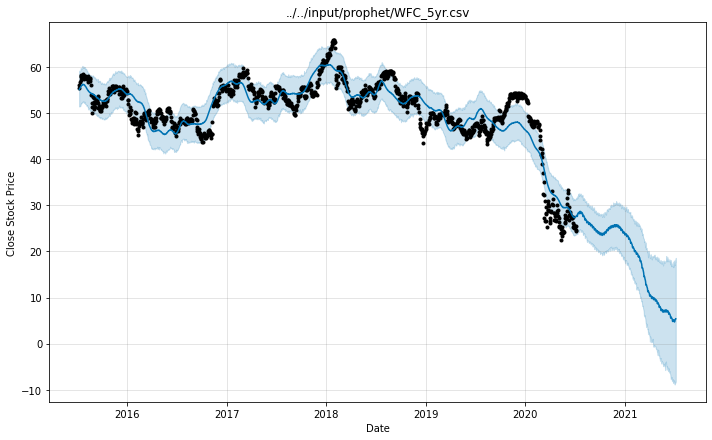

In [5]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title(filename)
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

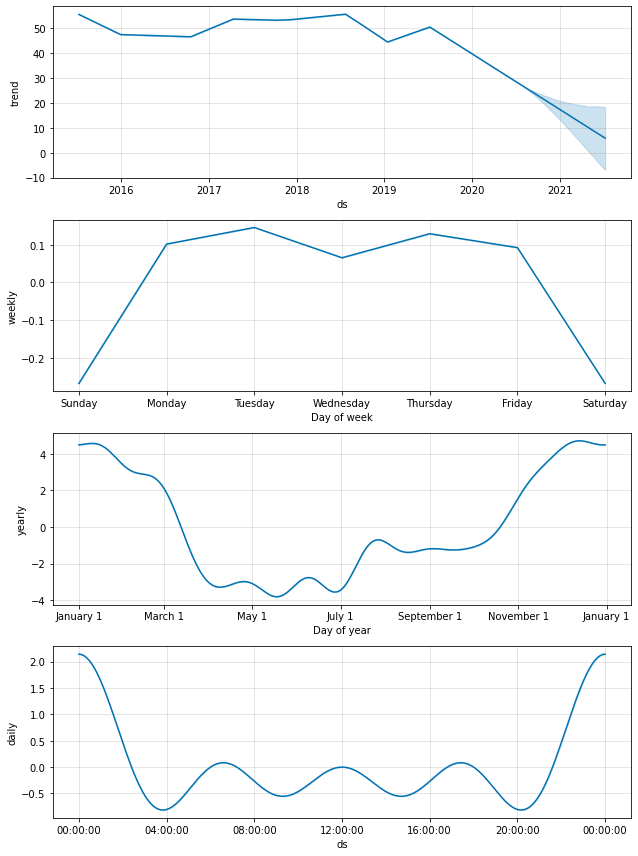

In [6]:
m.plot_components(prediction)
plt.show()